In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


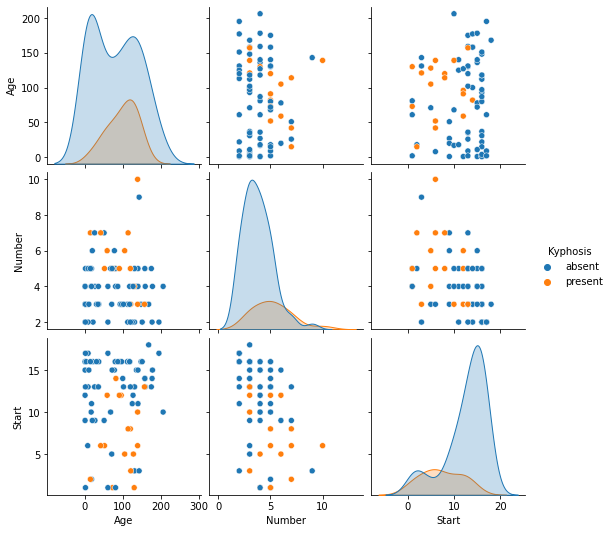

In [4]:
sns.pairplot(df,hue='Kyphosis')

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# DECISION TREE

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree=DecisionTreeClassifier()

In [29]:
t=dtree.fit(X_train,y_train)

In [30]:
prediction=dtree.predict(X_test)

In [31]:
dtree.predict([[3,6,5]])

C:\Users\TATA BHARATH YADAV\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['absent'], dtype=object)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.76      0.76      0.76        17
     present       0.50      0.50      0.50         8

    accuracy                           0.68        25
   macro avg       0.63      0.63      0.63        25
weighted avg       0.68      0.68      0.68        25

[[13  4]
 [ 4  4]]


# RANDOM FOREST

In [34]:
#ALWAYS RANDOM FOREST GIVES BETTER ACCURACY THAN DESCISION FOREST SO USE 
#RANDOM FOREST OFTEN INSTEAD OF DESCISON TREE

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier(n_estimators=200)

In [37]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
rfc_pred=rfc.predict(X_test)

In [39]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      0.88      0.83        17
     present       0.67      0.50      0.57         8

    accuracy                           0.76        25
   macro avg       0.73      0.69      0.70        25
weighted avg       0.75      0.76      0.75        25

[[15  2]
 [ 4  4]]


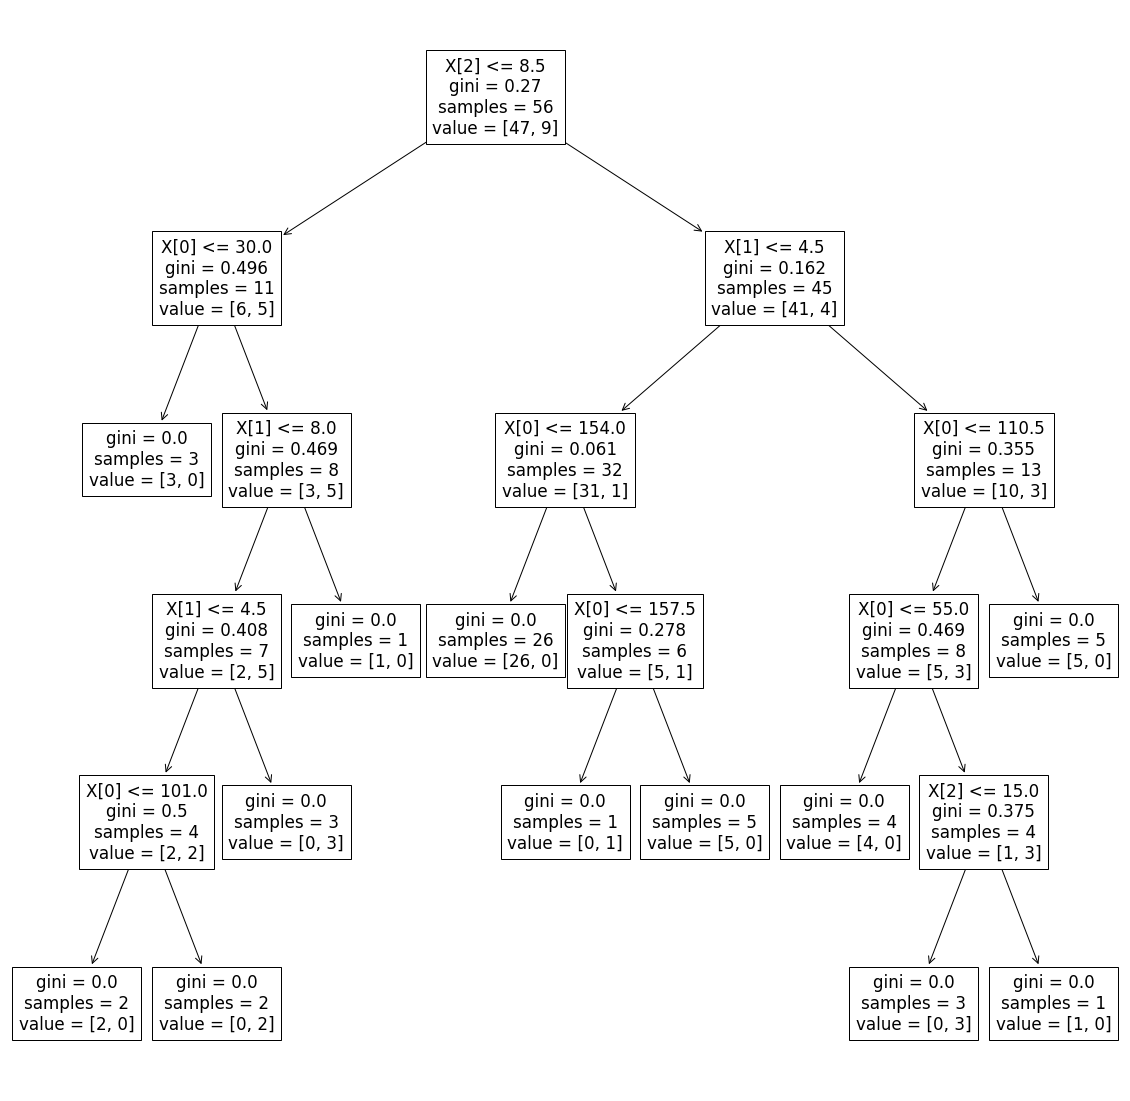

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))  # Set the figure size
tree.plot_tree(t)  # Assuming 't' is your decision tree model
plt.show()
